# Exploring mutlislice simulation paramteres with Silicon
In these examples will be using the same structure and play around with some parameters and features of the **autoslic** program. 
Most of the arguments and parameters have been presented in [example_0](http://badb.rc-harwell.ac.uk:8888/notebooks/multislice/example_0.ipynb). 
- [Base simulation](#Base-simulation)
- [Reducing the slice thickness](#Reducing-the-slice-thickness)

In [3]:
import multislice.multislice as mupy       # the temsim wrapper module
import multislice.postprocess as pp        # the temsim wrapper module
from utils import*                         # utilities
path = 'data/test/'

## Base simulation 


Since we will be simulating the same crystal orientation using different parameters, the `tail` parameter can be used to distinguish the simulations from one another by adding it to the naming convention. 

In [33]:
args = {'name':path,'mulslice':False,'data':'Si110.xyz','keV':200,
             'repeat':[2,2,100],'NxNy':512,'slice_thick':1.91,'Nhk':3}

multi0 = mupy.Multislice(tail='base', opt='srfp',ppopt='w',ssh='badb',**args)

Simu name pattern = test_base_autoslic
ax=3.840A, by=5.430, cz= 3.83959
thickness = 383.959 A
Decks saved :
/data3/lii26466/multislice/test/test_base_autoslic.in
object saved
/data3/lii26466/multislice/test/test_base_autoslic.pkl
Simulation already performed in the past.
done
...postprocessing...


loading data/test/test_base_autoslic.pkl
displaying pattern: (330, 330)


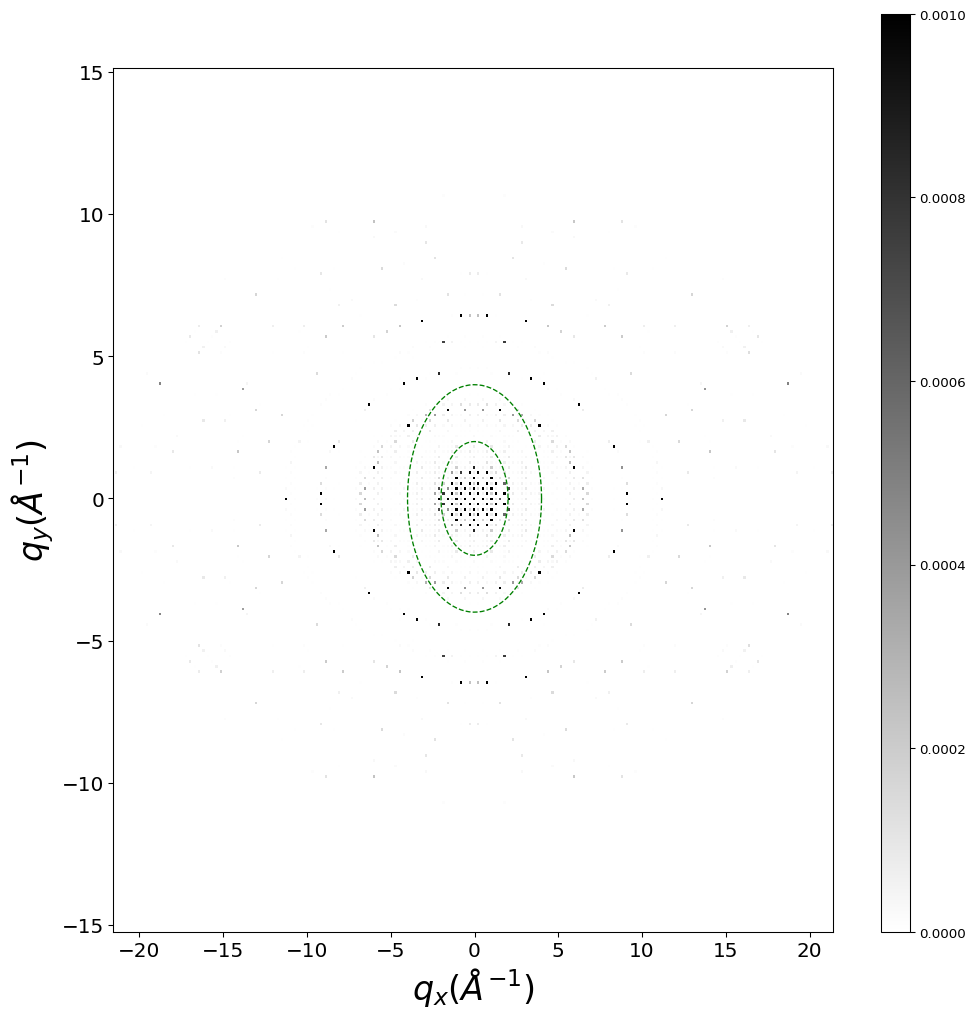

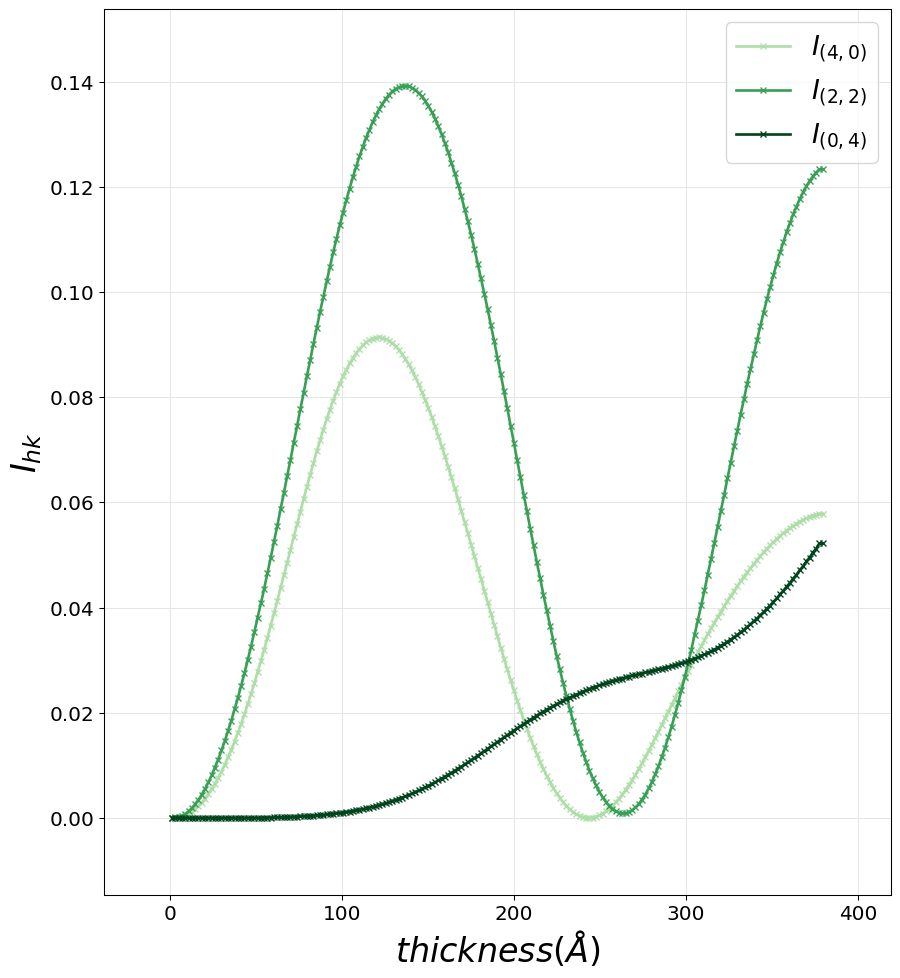

In [34]:
multi0 = pp.load(path,tag='base')
multi0.pattern(Iopt='cns',tol=1e-5,rings=[2,4],caxis=[0,0.001],xylims=5)
multi0.beam_vs_thickness()

## Reducing the slice thickness

Reducing the slice thickness in the current implementation of TEMSIM does not provide a more accurate simulaton. 
Indeed, if a slice does not contain the center of an atom, its transmission function will be  unity even though there is some electrostatic potential in this slice.  

Here we divide the slice thickness by 4 keeping all other things constants. 

In [18]:
args1=args.copy()
args1['slice_thick'] /= 4
multi1 = mupy.Multislice(tag='slice', opt='srfp',ppopt='w',ssh='badb',**args1)

Simu name pattern = test_slice_autoslic
ax=3.840A, by=5.430, cz= 3.83959
thickness = 383.959 A
Decks saved :
/data3/lii26466/multislice/test/test_slice_autoslic.in
object saved
/data3/lii26466/multislice/test/test_slice_autoslic.pkl
Simulation already performed in the past.
/data3/lii26466/multislice/test/test_slice_autoslic.sh

test_slice_autoslic job submitted at Fri Apr 16 10:13:49 2021


By comparing the beam evolution with thickness for the **base** and the reduced **slice** thickness simulation, it is clear that the addition of the intermediate slices do not have any effect on the propagation of the beam. 
This is obvious from the constant lines appearing in the thickness dependant evolution of the beam.

loading data/test/test_base_autoslic.pkl
loading data/test/test_slice_autoslic.pkl


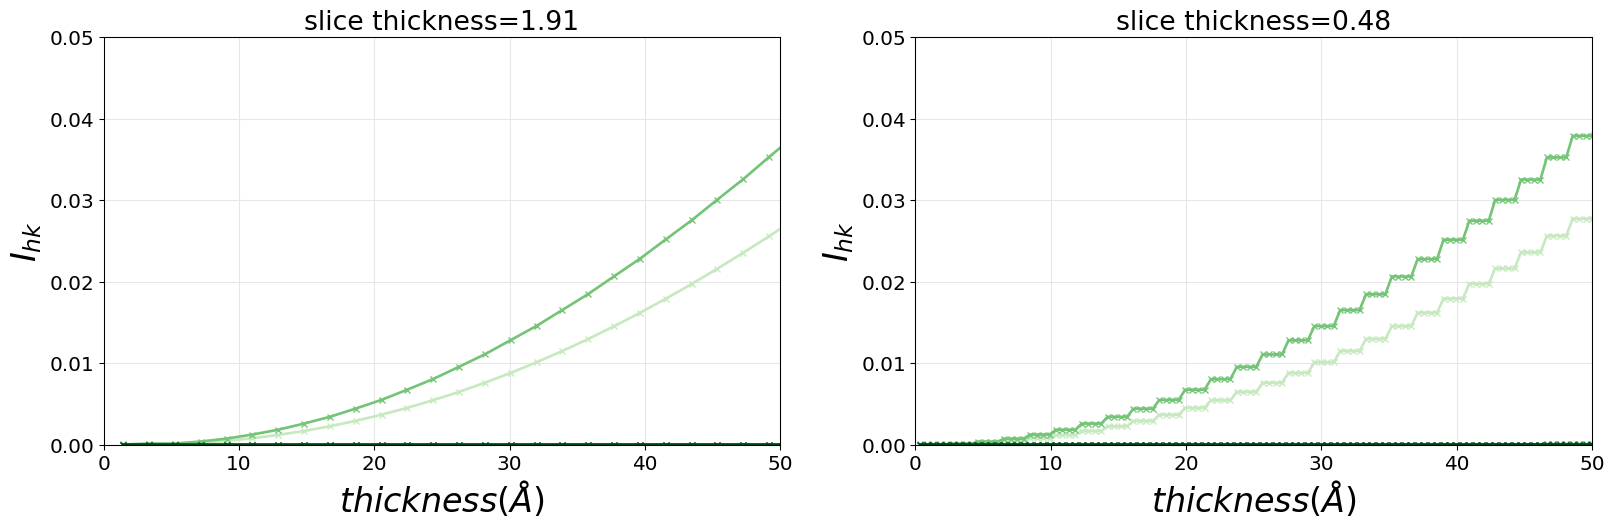

In [32]:
multi0 = pp.load(path,'base')
multi1 = pp.load(path,'slice')
fig,(ax0,ax1) = dsp.create_fig(figsize='21',rc='12')
multi0.beam_vs_thickness(tol=1e-3,xylims=[0,50,0,0.05],title='slice thickness=%.2f' %args['slice_thick'] ,ax=ax0,pOpt='tXG')
multi1.beam_vs_thickness(tol=1e-3,xylims=[0,50,0,0.05],title='slice thickness=%.2f' %args1['slice_thick'],ax=ax1,pOpt='tXG')